# The Data

For this series of lectures, we will be using the famous Iris flower data set.

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Here's a picture of the three different Iris types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
iris=sns.load_dataset('iris')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Exploratory data science

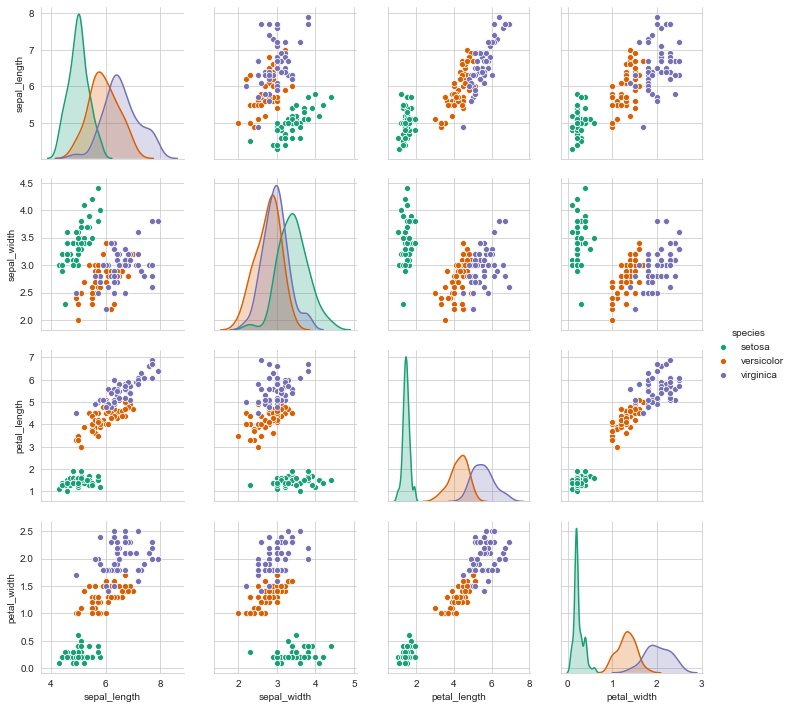

In [8]:
sns.pairplot(iris,hue='species',palette='Dark2')

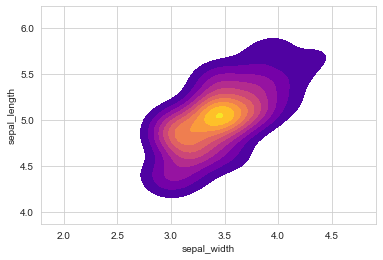

In [12]:
setosa=iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'],setosa['sepal_length'],cmap='plasma',shade=True,shade_lowest=False)

# split the data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=iris.drop('species',axis=1)
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# train the model

In [15]:
from sklearn.svm import SVC 

In [16]:
model_svc=SVC()

In [17]:
model_svc.fit(X_train,y_train)

c:\program files\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
predictions=model_svc.predict(X_test)

# evaluating the model

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[14  0  0]
 [ 0 13  1]
 [ 0  1 16]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      0.93      0.93        14
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# applying grid search

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [25]:
grid=GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [26]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [28]:
grid_predictions=grid.predict(X_test)

In [29]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[14  0  0]
 [ 0 12  2]
 [ 0  1 16]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.92      0.86      0.89        14
   virginica       0.89      0.94      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

